# ДЗ 1

## Задание 1

Добиться вразумительного результата от модели, собранной на занятии (7 угаданныx картинок из 10 предложенных на семинаре).

In [10]:
import torch

In [11]:
print(torch.__version__)

1.7.0


In [485]:
import torchvision

import numpy as np
import pandas as pd

from torch import nn 
from torch import optim

import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torch.nn.functional as F

## Базовый вариант

In [51]:
train_dataset = torchvision.datasets.CIFAR10(root='./train',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [52]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [81]:
test_dataset = torchvision.datasets.CIFAR10(root='./test', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=5,
                                         shuffle=False)

Files already downloaded and verified


In [54]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [55]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [37]:
#!L
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [38]:
#!L
net = Net().to(device)

In [39]:
#!L
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [56]:
#!L
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        inputs, labels = inputs.cuda(), labels.cuda()

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.345
[1,   601] loss: 0.345
[2,     1] loss: 0.001
[2,   301] loss: 0.345
[2,   601] loss: 0.344
[3,     1] loss: 0.001
[3,   301] loss: 0.338
[3,   601] loss: 0.323
[4,     1] loss: 0.001
[4,   301] loss: 0.300
[4,   601] loss: 0.293
[5,     1] loss: 0.001
[5,   301] loss: 0.283
[5,   601] loss: 0.274
[6,     1] loss: 0.001
[6,   301] loss: 0.263
[6,   601] loss: 0.254
[7,     1] loss: 0.001
[7,   301] loss: 0.246
[7,   601] loss: 0.241
[8,     1] loss: 0.001
[8,   301] loss: 0.235
[8,   601] loss: 0.233
[9,     1] loss: 0.001
[9,   301] loss: 0.227
[9,   601] loss: 0.224
[10,     1] loss: 0.001
[10,   301] loss: 0.222
[10,   601] loss: 0.219
Training is finished!


In [91]:
PATH = './cifar_net_version_test_intro_base.pth'
torch.save(net.state_dict(), PATH)

In [92]:
net = Net().to('cpu')
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

GroundTruth:
     bird     deer    plane    truck     frog
Predicted:
     bird     frog    horse    truck     frog


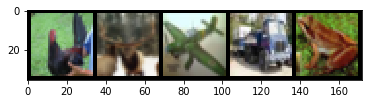

GroundTruth:
     frog      dog     deer      dog    truck
Predicted:
     frog    horse     deer     frog    truck


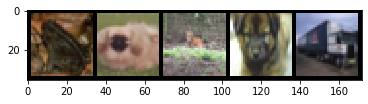

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:469: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [93]:
data_iter = iter(test_loader)
[data_iter.next() for i in range(5)]

for i in range(2):
    images, labels = data_iter.next()
    outputs = net(images)
    imgs = torchvision.utils.make_grid(images)
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(5)))

    _, predicted = torch.max(outputs, 1)
    print('Predicted:\n', ' '.join('%8s' % classes[predicted[j]] for j in range(5)))
    plt.imshow(imgs.permute(1, 2, 0).numpy())
    plt.show()

# Пример из документации pytorch

In [594]:
#!L
from typing import List, Tuple
import os

import torch
import torchvision
import torchvision.transforms as transforms

In [380]:
#!L
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=8)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [381]:
#!L
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [392]:
#!L
import torch.optim as optim

net = Net()
print("Модель state_dict: ")
for param in net.state_dict():
    print("\t", param,": ", net.state_dict()[param].size())

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Модель state_dict: 
	 conv1.weight :  torch.Size([6, 3, 5, 5])
	 conv1.bias :  torch.Size([6])
	 conv2.weight :  torch.Size([16, 6, 5, 5])
	 conv2.bias :  torch.Size([16])
	 fc1.weight :  torch.Size([120, 400])
	 fc1.bias :  torch.Size([120])
	 fc2.weight :  torch.Size([84, 120])
	 fc2.bias :  torch.Size([84])
	 fc3.weight :  torch.Size([10, 84])
	 fc3.bias :  torch.Size([10])
[1,  2000] loss: 2.211
[1,  4000] loss: 1.875
[1,  6000] loss: 1.677
[1,  8000] loss: 1.552
[1, 10000] loss: 1.494
[1, 12000] loss: 1.442
[2,  2000] loss: 1.382
[2,  4000] loss: 1.377
[2,  6000] loss: 1.350
[2,  8000] loss: 1.314
[2, 10000] loss: 1.309
[2, 12000] loss: 1.283
Finished Training


In [383]:
#!L
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5,
                                         shuffle=False, num_workers=8)

GroundTruth:
     bird     deer    plane    truck     frog
Predicted:
     bird     deer    plane    plane     bird


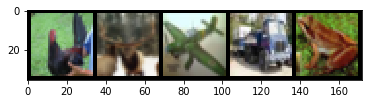

GroundTruth:
     frog      dog     deer      dog    truck
Predicted:
     bird    plane    plane      cat     ship


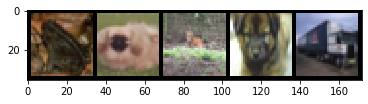

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:469: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [384]:
#!L
data_iter = iter(test_loader)
[data_iter.next() for i in range(5)]

for i in range(2):
    images, labels = data_iter.next()
    
    outputs = net(images)
    imgs = torchvision.utils.make_grid(images)
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(5)))

    _, predicted = torch.max(outputs, 1)
    print('Predicted:\n', ' '.join('%8s' % classes[predicted[j]] for j in range(5)))
    plt.imshow(imgs.permute(1, 2, 0).numpy())
    plt.show()

## Улучшение модели

In [399]:
#!L
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(6 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
#         print("X размеры : %s\n" % (x.shape,))
        x = self.pool(F.relu(self.conv1(x)))
#         print("X размеры : %s\n" % (x.shape,))
#         x = self.pool(F.relu(self.conv2(x)))
#         print("X размеры : %s\n" % (x.shape,))
        x = x.view(-1, 6 * 14 * 14)
#         print("X размеры : %s\n" % (x.shape,))
        x = F.relu(self.fc1(x))
#         print("X размеры : %s\n" % (x.shape,))
        x = F.relu(self.fc2(x))
#         print("X размеры : %s\n" % (x.shape,))
        x = self.fc3(x)
#         print("X размеры : %s\n" % (x.shape,))
        return x

In [401]:
#!L
net = Net()
print("\tМодель state_dict: ")
for param in net.state_dict():
    print("\t\t", param,": ", net.state_dict()[param].size())

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

	Модель state_dict: 
		 conv1.weight :  torch.Size([6, 3, 5, 5])
		 conv1.bias :  torch.Size([6])
		 fc1.weight :  torch.Size([512, 1176])
		 fc1.bias :  torch.Size([512])
		 fc2.weight :  torch.Size([128, 512])
		 fc2.bias :  torch.Size([128])
		 fc3.weight :  torch.Size([10, 128])
		 fc3.bias :  torch.Size([10])
[1,  2000] loss: 1.999
[1,  4000] loss: 1.642
[1,  6000] loss: 1.527
[1,  8000] loss: 1.475
[1, 10000] loss: 1.429
[1, 12000] loss: 1.412
[2,  2000] loss: 1.305
[2,  4000] loss: 1.301
[2,  6000] loss: 1.284
[2,  8000] loss: 1.273
[2, 10000] loss: 1.270
[2, 12000] loss: 1.236
[3,  2000] loss: 1.128
[3,  4000] loss: 1.136
[3,  6000] loss: 1.125
[3,  8000] loss: 1.134
[3, 10000] loss: 1.139
[3, 12000] loss: 1.110
[4,  2000] loss: 0.992
[4,  4000] loss: 0.977
[4,  6000] loss: 1.013
[4,  8000] loss: 1.011
[4, 10000] loss: 0.997
[4, 12000] loss: 1.021
[5,  2000] loss: 0.829
[5,  4000] loss: 0.855
[5,  6000] loss: 0.890
[5,  8000] loss: 0.888
[5, 10000] loss: 0.903
[5, 12000] loss: 

GroundTruth:
     bird     deer    plane    truck     frog
Predicted:
     deer     deer    plane     bird     deer


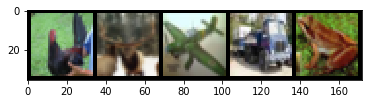

GroundTruth:
     frog      dog     deer      dog    truck
Predicted:
     deer      dog    plane     bird     bird


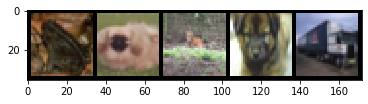

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:469: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [402]:
#!L
data_iter = iter(test_loader)
[data_iter.next() for i in range(5)]

for i in range(2):
    images, labels = data_iter.next()
    
    outputs = net(images)
    imgs = torchvision.utils.make_grid(images)
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(5)))

    _, predicted = torch.max(outputs, 1)
    print('Predicted:\n', ' '.join('%8s' % classes[predicted[j]] for j in range(5)))
    plt.imshow(imgs.permute(1, 2, 0).numpy())
    plt.show()

In [406]:
#!L
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=8)

Files already downloaded and verified


In [610]:
#!L
class HPSearchNET(nn.Module):
    
    def __init__(self, cnn_num=2, fc_num=2, cnn_filt_num=16, kern_size=3, func_act='relu', in_shape=32, nn_prn=False):
        super(HPSearchNET, self).__init__()

        self.in_size = 3
        self.cnn_num = cnn_num
        self.fc_num = fc_num
        self.cnn_filt_num = cnn_filt_num
        self.kern_size = kern_size
        self.func_act = func_act
        self.fs_size = 0
        self.in_shape = in_shape
        self.nn_prn = nn_prn
        
        if kern_size == 3:
            padd = (1, 1)
        if kern_size == 5:
            padd = (2, 2)
        self.str_f_act = "F.relu"
        if func_act == 'sigmoid':
            self.str_f_act = "torch.sigmoid"

        self.conv1 = nn.Conv2d(self.in_size, self.cnn_filt_num, kernel_size=self.kern_size, stride=1, padding=padd)
        self.pool = nn.MaxPool2d(2, 2)
        if self.cnn_num > 1:
            self.conv2 = nn.Conv2d(self.cnn_filt_num, self.cnn_filt_num*2, kernel_size=self.kern_size, stride=1, padding=padd)
            self.cnn_filt_num *= 2
            if self.cnn_num > 2:
                self.conv3 = nn.Conv2d(self.cnn_filt_num, self.cnn_filt_num*2, kernel_size=self.kern_size, stride=1, padding=padd)
                self.cnn_filt_num *= 2
        
        self.fs_size = self.cnn_filt_num * (self.in_shape//2**self.cnn_num) ** 2
        fs_sz = self.fs_size
        
        if self.fc_num > 2:
            self.fc_dec2 = nn.Linear(fs_sz, fs_sz//4)   # fs_sz*3//4
            fs_sz=fs_sz//4   #*3//4
        if self.fc_num > 1:
            self.fc_dec1 = nn.Linear(fs_sz, fs_sz//4)   # fs_sz*3//4
            fs_sz=fs_sz//4   # *3//4
        self.fc_out = nn.Linear(fs_sz, 10)

    def forward(self, x):
        if self.nn_prn:
            print("X размеры income: %s\n" % (x.shape,))
        x = self.pool(eval(self.str_f_act)(self.conv1(x)))
        if self.nn_prn:
            print("X размеры conv1, pool: %s\n" % (x.shape,))
        if self.cnn_num > 1:
            x = self.pool(eval(self.str_f_act)(self.conv2(x)))
            if self.nn_prn:
                print("X размеры conv2, pool: %s\n" % (x.shape,))
            if self.cnn_num > 2:
                x = self.pool(eval(self.str_f_act)(self.conv3(x)))
                if self.nn_prn:
                    print("X размеры conv3, pool: %s\n" % (x.shape,))
        x = x.view(-1, self.fs_size)
        if self.nn_prn:
            print("X размеры x.view: %s\n" % (x.shape,))
        if self.fc_num > 2:
            x = eval(self.str_f_act)(self.fc_dec2(x))
            if self.nn_prn:
                print("X размеры fc_dec2: %s\n" % (x.shape,))
        if self.fc_num > 1:
            x = eval(self.str_f_act)(self.fc_dec1(x))
            if self.nn_prn:
                print("X размеры fc_dec1: %s\n" % (x.shape,))
        x = self.fc_out(x)
        if self.nn_prn:
            print("X размеры fc_out: %s\n" % (x.shape,))
            self.nn_prn = False
        return x

In [409]:
#!L
net = HPSearchNET(cnn_num=2, 
                  fc_num=2, 
                  kern_size=3, 
                  func_act='relu', 
                  in_shape=32)
print("\tМодель state_dict: ")
for param in net.state_dict():
    print("\t\t", param,": ", net.state_dict()[param].size())

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 300 == 299:    # print every 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0

print('Finished Training')

	Модель state_dict: 
		 conv1.weight :  torch.Size([8, 3, 3, 3])
		 conv1.bias :  torch.Size([8])
		 conv2.weight :  torch.Size([16, 8, 3, 3])
		 conv2.bias :  torch.Size([16])
		 fc_dec1.weight :  torch.Size([256, 1024])
		 fc_dec1.bias :  torch.Size([256])
		 fc_out.weight :  torch.Size([10, 256])
		 fc_out.bias :  torch.Size([10])
[1,   300] loss: 2.291
[1,   600] loss: 2.170
[2,   300] loss: 1.920
[2,   600] loss: 1.815
Finished Training


GroundTruth:
     bird     deer    plane    truck     frog
Predicted:
    plane    plane    plane    plane     bird


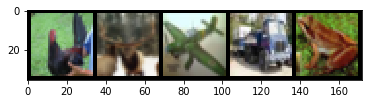

GroundTruth:
     frog      dog     deer      dog    truck
Predicted:
     bird    plane    plane    plane    plane


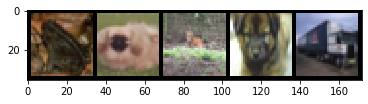

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:469: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [410]:
#!L
data_iter = iter(test_loader)
[data_iter.next() for i in range(5)]

for i in range(2):
    images, labels = data_iter.next()
    
    outputs = net(images)
    imgs = torchvision.utils.make_grid(images)
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(5)))

    _, predicted = torch.max(outputs, 1)
    print('Predicted:\n', ' '.join('%8s' % classes[predicted[j]] for j in range(5)))
    plt.imshow(imgs.permute(1, 2, 0).numpy())
    plt.show()

In [421]:
#!L
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=8)

In [426]:
#!L
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = HPSearchNET(cnn_num=3, 
                  fc_num=3, 
                  kern_size=3, 
                  func_act='relu', 
                  in_shape=32).to(device)
print("\tМодель state_dict: ")
for param in net.state_dict():
    print("\t\t", param,": ", net.state_dict()[param].size())

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(70):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

	Модель state_dict: 
		 conv1.weight :  torch.Size([8, 3, 3, 3])
		 conv1.bias :  torch.Size([8])
		 conv2.weight :  torch.Size([16, 8, 3, 3])
		 conv2.bias :  torch.Size([16])
		 conv3.weight :  torch.Size([32, 16, 3, 3])
		 conv3.bias :  torch.Size([32])
		 fc_dec2.weight :  torch.Size([128, 512])
		 fc_dec2.bias :  torch.Size([128])
		 fc_dec1.weight :  torch.Size([32, 128])
		 fc_dec1.bias :  torch.Size([32])
		 fc_out.weight :  torch.Size([10, 32])
		 fc_out.bias :  torch.Size([10])
[1,   100] loss: 2.307
[2,   100] loss: 2.304
[3,   100] loss: 2.303
[4,   100] loss: 2.302
[5,   100] loss: 2.301
[6,   100] loss: 2.299
[7,   100] loss: 2.298
[8,   100] loss: 2.295
[9,   100] loss: 2.292
[10,   100] loss: 2.284
[11,   100] loss: 2.267
[12,   100] loss: 2.215
[13,   100] loss: 2.087
[14,   100] loss: 2.007
[15,   100] loss: 1.969
[16,   100] loss: 1.929
[17,   100] loss: 1.870
[18,   100] loss: 1.816
[19,   100] loss: 1.767
[20,   100] loss: 1.731
[21,   100] loss: 1.683
[22,   100] 

In [427]:
#!L
path_wt = f'./cifar_net_{"relu"}_cnn{3}_fc{3}_kr{3}_ep{70}.pth'
torch.save(net.state_dict(), path_wt)

In [428]:
#!L
net = HPSearchNET(cnn_num=3, 
                  fc_num=3, 
                  kern_size=3, 
                  func_act='relu', 
                  in_shape=32)

net.load_state_dict(torch.load(path_wt))

<All keys matched successfully>

GroundTruth:
     bird     deer    plane    truck     frog
Predicted:
      cat     bird    plane    plane      cat


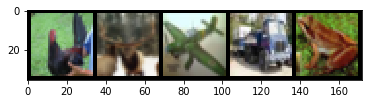

GroundTruth:
     frog      dog     deer      dog    truck
Predicted:
     bird      cat    plane      cat     ship


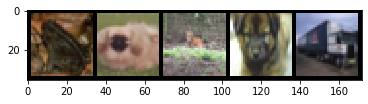

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:469: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [429]:
#!L
data_iter = iter(test_loader)
[data_iter.next() for i in range(5)]

for i in range(2):
    images, labels = data_iter.next()
    
    outputs = net(images)
    imgs = torchvision.utils.make_grid(images)
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(5)))

    _, predicted = torch.max(outputs, 1)
    print('Predicted:\n', ' '.join('%8s' % classes[predicted[j]] for j in range(5)))
    plt.imshow(imgs.permute(1, 2, 0).numpy())
    plt.show()

In [432]:
#!L
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = HPSearchNET(cnn_num=3, 
                  fc_num=3, 
                  kern_size=3, 
                  func_act='relu', 
                  in_shape=32).to(device)
print("\tМодель state_dict: ")
for param in net.state_dict():
    print("\t\t", param,": ", net.state_dict()[param].size())

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

	Модель state_dict: 
		 conv1.weight :  torch.Size([16, 3, 3, 3])
		 conv1.bias :  torch.Size([16])
		 conv2.weight :  torch.Size([32, 16, 3, 3])
		 conv2.bias :  torch.Size([32])
		 conv3.weight :  torch.Size([64, 32, 3, 3])
		 conv3.bias :  torch.Size([64])
		 fc_dec2.weight :  torch.Size([256, 1024])
		 fc_dec2.bias :  torch.Size([256])
		 fc_dec1.weight :  torch.Size([64, 256])
		 fc_dec1.bias :  torch.Size([64])
		 fc_out.weight :  torch.Size([10, 64])
		 fc_out.bias :  torch.Size([10])
[1,   100] loss: 2.304
[2,   100] loss: 2.302
[3,   100] loss: 2.301
[4,   100] loss: 2.300
[5,   100] loss: 2.299
[6,   100] loss: 2.296
[7,   100] loss: 2.292
[8,   100] loss: 2.283
[9,   100] loss: 2.257
[10,   100] loss: 2.178
[11,   100] loss: 2.088
[12,   100] loss: 2.026
[13,   100] loss: 1.958
[14,   100] loss: 1.895
[15,   100] loss: 1.835
[16,   100] loss: 1.774
[17,   100] loss: 1.732
[18,   100] loss: 1.680
[19,   100] loss: 1.642
[20,   100] loss: 1.592
[21,   100] loss: 1.576
[22,   1

In [433]:
#!L
path_wt = f'./cifar_net_{"relu"}_cnn{3}_fc{3}_kr{3}_ep{100}.pth'
torch.save(net.state_dict(), path_wt)

In [434]:
#!L
net = HPSearchNET(cnn_num=3, 
                  fc_num=3, 
                  kern_size=3, 
                  func_act='relu', 
                  in_shape=32)

net.load_state_dict(torch.load(path_wt))

<All keys matched successfully>

GroundTruth:
     bird     deer    plane    truck     frog
Predicted:
      cat     bird     deer    truck     deer


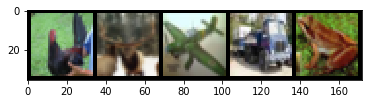

GroundTruth:
     frog      dog     deer      dog    truck
Predicted:
     bird      dog      cat      cat     ship


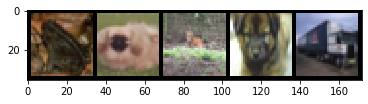

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:469: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [435]:
#!L
data_iter = iter(test_loader)
[data_iter.next() for i in range(5)]

for i in range(2):
    images, labels = data_iter.next()
    
    outputs = net(images)
    imgs = torchvision.utils.make_grid(images)
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(5)))

    _, predicted = torch.max(outputs, 1)
    print('Predicted:\n', ' '.join('%8s' % classes[predicted[j]] for j in range(5)))
    plt.imshow(imgs.permute(1, 2, 0).numpy())
    plt.show()

In [440]:
#!L
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [477]:
#!L
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [478]:
#!L
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
print("Модель state_dict: ")
for param in net.state_dict():
    print("\t", param,": ", net.state_dict()[param].size())

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(12):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 300 == 299:    # print every 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0

print('Finished Training')

Модель state_dict: 
	 conv1.weight :  torch.Size([6, 3, 5, 5])
	 conv1.bias :  torch.Size([6])
	 conv2.weight :  torch.Size([16, 6, 5, 5])
	 conv2.bias :  torch.Size([16])
	 fc1.weight :  torch.Size([120, 400])
	 fc1.bias :  torch.Size([120])
	 fc2.weight :  torch.Size([84, 120])
	 fc2.bias :  torch.Size([84])
	 fc3.weight :  torch.Size([10, 84])
	 fc3.bias :  torch.Size([10])
[1,   300] loss: 2.304
[1,   600] loss: 2.302
[2,   300] loss: 2.297
[2,   600] loss: 2.287
[3,   300] loss: 2.194
[3,   600] loss: 2.088
[4,   300] loss: 2.006
[4,   600] loss: 1.988
[5,   300] loss: 1.935
[5,   600] loss: 1.908
[6,   300] loss: 1.849
[6,   600] loss: 1.826
[7,   300] loss: 1.749
[7,   600] loss: 1.707
[8,   300] loss: 1.655
[8,   600] loss: 1.624
[9,   300] loss: 1.583
[9,   600] loss: 1.559
[10,   300] loss: 1.534
[10,   600] loss: 1.510
[11,   300] loss: 1.492
[11,   600] loss: 1.476
[12,   300] loss: 1.451
[12,   600] loss: 1.432
Finished Training


In [479]:
#!L
path_wt = f'./cifar_net_b.pth'
torch.save(net.state_dict(), path_wt)

In [480]:
#!L
net = Net()

net.load_state_dict(torch.load(path_wt))

<All keys matched successfully>

GroundTruth:
      cat     ship     ship    plane     frog
Predicted:
      cat     ship      car     ship     frog


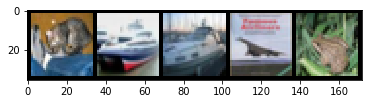

GroundTruth:
     frog      car     frog      cat      car
Predicted:
     frog      car     frog      dog      car


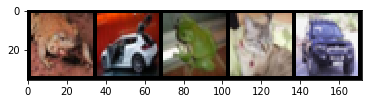

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:469: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [481]:
#!L
data_iter = iter(test_loader)
[data_iter.next() for i in range(0)]

for i in range(2):
    images, labels = data_iter.next()
    
    outputs = net(images)
    imgs = torchvision.utils.make_grid(images)
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(5)))

    _, predicted = torch.max(outputs, 1)
    print('Predicted:\n', ' '.join('%8s' % classes[predicted[j]] for j in range(5)))
    plt.imshow(imgs.permute(1, 2, 0).numpy())
    plt.show()

## Подбор гиперпараметров

In [623]:
#!L
traindataset = torchvision.datasets.CIFAR10(root='./train',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)

trainloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [624]:
#!L
class HyperParSearch:
    
    def __init__(self):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.net = None
        self.summary_data = pd.DataFrame(data=[[0, 0, 0, 0, 0, 0, 0, 0, 0]], 
                            columns=['func', 'cnn_num', 'fc_num', 'kern_size', 'loss', 'accuracy', 'variance', 'l_b', 'r_b'])
        self.cnn_num = [2, 3]
        self.fc_num = [2, 3]
#         self.cnn_filt_num = [16]
        self.kern_size = [3, 5]
        self.func_act = ['relu', 'sigmoid']
        self.epochs = 5
        self.in_shape = 32

    def net_sample(self):
        if net == None:
            return 0
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(self.net.parameters(), lr=0.001, momentum=0.9)   # lr=0.001
        ep_loss_list = []
        ep_acc_list = []
        for epoch in range(self.epochs):
            total_loss = 0
            loss_list = []
            acc_list = []
            running_loss = 0.0
            
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
#                 if self.device == "cuda:0":
                inputs, labels = inputs.cuda(), labels.cuda()

                # обнуляем градиент
                optimizer.zero_grad()

                outputs = self.net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                # print statistics
                running_loss += loss.item()
                if i % 100 == 99:    # print every 100 mini-batches
                    print('\t\t\t[%d, %5d] loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 100))
                    running_loss = 0.0

                # выводим статистику о процессе обучения
                loss_list.append(loss.item())

                # Отслеживание точности
                total = labels.size(0)
                _, predicted = torch.max(outputs.data, 1)
                correct = (predicted == labels).sum().item()
                acc_list.append(correct / total)
                
            ep_loss_list.append(sum(loss_list) / len(loss_list))
            ep_acc_list.append(sum(acc_list) / len(acc_list))
            print(f"\t\tЭпоха: {epoch+1}\tloss: {ep_loss_list[-1]:.6f}\taccuracy: {ep_acc_list[-1]*100:.3f}%")
        return ep_loss_list, ep_acc_list
        
    def grid_search(self):
        cnt = 0
        
        path_dir = './net'
        if not os.path.exists(path_dir):
            os.mkdir(path_dir)
        
        for f_a in self.func_act:
            for c_n in self.cnn_num:
                for f_n in self.fc_num:
                    for k_s in self.kern_size:
                        loss_m = []
                        acc_m = []
                        print(f"Модель: функция активации: {f_a}, cnn слоёв: {c_n}, fc слоёв: {f_n}, kernel: {k_s}\n")
                        self.net = HPSearchNET(cnn_num=c_n, 
                                               fc_num=f_n, 
#                                                cnn_filt_num=16, 
                                               kern_size=k_s, 
                                               func_act=f_a, 
                                               in_shape=self.in_shape)   # .to(self.device)
                        print("\tМодель state_dict: ")
                        for param in self.net.state_dict():
                            print("\t\t", param,": ", self.net.state_dict()[param].size())
                        for i in range(3):
                            print(f"\n\tИтерация: {i+1}")
                            self.net = HPSearchNET(cnn_num=c_n, 
                                                   fc_num=f_n, 
#                                                    cnn_filt_num=16, 
                                                   kern_size=k_s, 
                                                   func_act=f_a, 
                                                   in_shape=self.in_shape).to(self.device)
                            loss_t, acc_t = self.net_sample()
                            loss_m.append(loss_t[-1])
                            acc_m.append(acc_t[-1])
                            torch.save(self.net.state_dict(), f'./net/cifar_net_{f_a}_cnn{c_n}_fc{f_n}_kr{k_s}.pth')

                        vr = np.var(loss_m)
                        l_b, r_b = self.calculate_confidence_interval(loss_m)
                        mean_loss = np.mean(loss_m)
                        mean_acc = np.mean(acc_m)
                        print(f"Ошибки на train. Средняя: {mean_loss:.5f} список: {loss_m}")
                        print(f"Accuracy на train. Средняя: {mean_acc:.5f} список: {acc_m}")
                        print(f"Дисперсия ошибки: {vr:.5f}")
                        print(f"Доверительный интервал: {l_b:.5f} - {r_b:.5f}\n\n")
                        self.summary_data.loc[cnt, ['func', 'cnn_num', 'fc_num', 
                                               'kern_size', 'loss', 'accuracy', 'variance', 
                                               'l_b', 'r_b']] = [f_a, c_n, f_n, k_s,
                                                        mean_loss, mean_acc, vr, l_b, r_b]
                        cnt += 1
        
    def calculate_confidence_interval(self, scores: list, conf_interval: float = 0.95) -> Tuple[float]:
        """
        Вычисление доверительного интервала.

        Parameters
        ----------
        scores: List[float / int]
            Список с оценками изучаемой величины.

        conf_interval: float, optional, default = 0.95
            Уровень доверия для построения интервала.
            Опциональный параметр, по умолчанию, равен 0.95.

        Returns
        -------
        conf_interval: Tuple[float]
            Кортеж с границами доверительного интервала.

        """
        left_bound = np.percentile(
            scores, ((1 - conf_interval) / 2) * 100
        )
        right_bound = np.percentile(
            scores, (conf_interval + ((1 - conf_interval) / 2)) * 100
        )

        return left_bound, right_bound

In [625]:
#!L
import pandas as pd

search_top = HyperParSearch()

In [626]:
#!L
search_top.grid_search()

Модель: функция активации: relu, cnn слоёв: 2, fc слоёв: 2, kernel: 3

	Модель state_dict: 
		 conv1.weight :  torch.Size([16, 3, 3, 3])
		 conv1.bias :  torch.Size([16])
		 conv2.weight :  torch.Size([32, 16, 3, 3])
		 conv2.bias :  torch.Size([32])
		 fc_dec1.weight :  torch.Size([512, 2048])
		 fc_dec1.bias :  torch.Size([512])
		 fc_out.weight :  torch.Size([10, 512])
		 fc_out.bias :  torch.Size([10])

	Итерация: 1
			[1,   100] loss: 2.300
			[1,   200] loss: 2.290
			[1,   300] loss: 2.279
			[1,   400] loss: 2.254
			[1,   500] loss: 2.221
			[1,   600] loss: 2.182
			[1,   700] loss: 2.137
		Эпоха: 1	loss: 2.226125	accuracy: 17.667%
			[2,   100] loss: 2.104
			[2,   200] loss: 2.084
			[2,   300] loss: 2.015
			[2,   400] loss: 1.967
			[2,   500] loss: 1.951
			[2,   600] loss: 1.918
			[2,   700] loss: 1.904
		Эпоха: 2	loss: 1.979797	accuracy: 29.438%
			[3,   100] loss: 1.852
			[3,   200] loss: 1.863
			[3,   300] loss: 1.812
			[3,   400] loss: 1.789
			[3,   500] loss: 

In [627]:
#!L
search_top.summary_data

,func,cnn_num,fc_num,kern_size,loss,accuracy,variance,l_b,r_b
0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,relu,2.0,2.0,3.0,1.495096,0.466073,3.030985e-06,1.493052,1.497102
2,relu,2.0,2.0,5.0,1.460847,0.476749,8.606419e-04,1.431615,1.498095
3,relu,2.0,3.0,3.0,1.706036,0.387128,1.096308e-03,1.663313,1.736804
4,relu,2.0,3.0,5.0,1.607422,0.421136,4.637098e-05,1.598505,1.612466
5,relu,3.0,2.0,3.0,1.784942,0.359408,7.633515e-03,1.714332,1.899229
6,relu,3.0,2.0,5.0,1.584011,0.429548,1.920079e-03,1.551107,1.641394
7,relu,3.0,3.0,3.0,2.001800,0.267477,2.826786e-03,1.941347,2.064958
8,relu,3.0,3.0,5.0,1.881528,0.315850,8.171287e-04,1.844094,1.903383
9,sigmoid,2.0,2.0,3.0,2.306855,0.100577,6.735406e-09,2.306769,2.306957


In [628]:
#!L
search_top.summary_data.sort_values('accuracy', ascending=False)

,func,cnn_num,fc_num,kern_size,loss,accuracy,variance,l_b,r_b
2,relu,2.0,2.0,5.0,1.460847,0.476749,8.606419e-04,1.431615,1.498095
1,relu,2.0,2.0,3.0,1.495096,0.466073,3.030985e-06,1.493052,1.497102
6,relu,3.0,2.0,5.0,1.584011,0.429548,1.920079e-03,1.551107,1.641394
4,relu,2.0,3.0,5.0,1.607422,0.421136,4.637098e-05,1.598505,1.612466
3,relu,2.0,3.0,3.0,1.706036,0.387128,1.096308e-03,1.663313,1.736804
5,relu,3.0,2.0,3.0,1.784942,0.359408,7.633515e-03,1.714332,1.899229
8,relu,3.0,3.0,5.0,1.881528,0.315850,8.171287e-04,1.844094,1.903383
7,relu,3.0,3.0,3.0,2.001800,0.267477,2.826786e-03,1.941347,2.064958
10,sigmoid,2.0,2.0,5.0,2.306486,0.101176,4.257510e-08,2.306218,2.306669
9,sigmoid,2.0,2.0,3.0,2.306855,0.100577,6.735406e-09,2.306769,2.306957


## Задание 2

Переписать данный туториал на pytorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

In [629]:
#!M
import torchvision

import numpy as np
import pandas as pd

import torch
from torch import nn 
from torch import optim

import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torch.nn.functional as F

In [630]:
#!M
thr_num = 8
batch_sz = 4

In [631]:
#!M
class SimpleNet(nn.Module):
    def __init__(self, nn_prn=False):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.dp = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(128, 10)
        self.nn_prn = nn_prn

    def forward(self, x):
        if self.nn_prn:
            print("X размеры in: %s\n" % (x.shape,))
        x = x.view(-1, 784)
        if self.nn_prn:
            print("X размеры view: %s\n" % (x.shape,))
        x = F.relu(self.fc1(x))
        if self.nn_prn:
            print("X размеры fc1: %s\n" % (x.shape,))
        x = self.dp(x)
        if self.nn_prn:
            print("X размеры dp: %s\n" % (x.shape,))
        x = F.softmax(self.fc2(x), dim=1)
        if self.nn_prn:
            print("X размеры fc2 out: %s\n" % (x.shape,))
            self.nn_prn = False
        return x

In [632]:
#!M
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])

In [493]:
#!M
mnist_train = torchvision.datasets.MNIST(root='./MNIST/train', 
                                         train=True, 
                                         download=True, 
                                         transform=transform)
mnist_train_loader = torch.utils.data.DataLoader(mnist_train,
                                                 batch_size=batch_sz,
                                                 shuffle=True,
                                                 num_workers=thr_num)

mnist_test = torchvision.datasets.MNIST(root='./MNIST/test', 
                                        train=False, 
                                        download=True, 
                                        transform=transform)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test,
                                                batch_size=batch_sz,
                                                shuffle=False,
                                                num_workers=thr_num)

Extracting ./MNIST/test/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw


Extracting ./MNIST/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw


Extracting ./MNIST/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw




Extracting ./MNIST/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw
Processing...
Done!


In [633]:
#!M
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [495]:
#!M
for data in enumerate(mnist_train_loader):
    print(data)
    break

(0, [tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1., 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


imgs размеры view: torch.Size([3, 32, 122])

GroundTruth:
        6        5        0        9


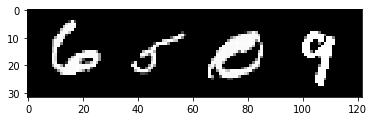

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


imgs размеры view: torch.Size([3, 32, 122])

GroundTruth:
        0        2        1        2


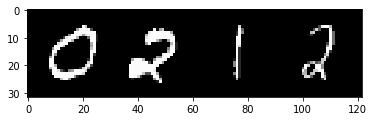

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:472: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [505]:
#!M
data_iter = iter(mnist_train_loader)
# [data_iter.next() for i in range(0)]

for i in range(2):
    images, labels = data_iter.next()
    
    imgs = torchvision.utils.make_grid(images)
    print("imgs размеры view: %s\n" % (imgs.shape,))
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(batch_sz)))
    plt.imshow(imgs.permute(1, 2, 0).numpy())
    plt.show()

In [507]:
#!M
%pip install opencv-python

     |████████████████████████████████| 49.5 MB 79 kB/s  eta 0:00:01
     |████████████████████████████████| 14.5 MB 111.7 MB/s eta 0:00:01
ERROR: torchvision 0.7.0 requires torch==1.6.0, but you'll have torch 1.7.0 which is incompatible.
cloud-ml 0.0.1 requires requests==2.22.0, but you'll have requests 2.25.0 which is incompatible.
cloud-ml 0.0.1 requires tqdm==4.45.0, but you'll have tqdm 4.52.0 which is incompatible.
ml-kernel 0.0.1 requires ipykernel==5.1.4, but you'll have ipykernel 5.3.4 which is incompatible.
ml-kernel 0.0.1 requires ipython==7.13.0, but you'll have ipython 7.19.0 which is incompatible.
ml-kernel 0.0.1 requires notebook==6.1.1, but you'll have notebook 6.1.5 which is incompatible.
ipystate 0.0.1 requires ipython==7.13.0, but you'll have ipython 7.19.0 which is incompatible.


In [508]:
#!M
import cv2

images размеры view: torch.Size([4, 1, 28, 28])

gray_image размеры view: (32, 122)

GroundTruth:
        1        4        4        2


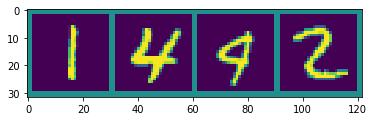

images размеры view: torch.Size([4, 1, 28, 28])

gray_image размеры view: (32, 122)

GroundTruth:
        4        3        2        3


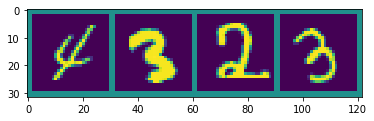

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:472: UserWarning: The following variables cannot be serialized: data_iter
  warnings.warn(message)


In [515]:
#!M
data_iter = iter(mnist_train_loader)
# [data_iter.next() for i in range(0)]

for i in range(2):
    images, labels = data_iter.next()
    print("images размеры view: %s\n" % (images.shape,))
    imgs = torchvision.utils.make_grid(images)
    
    gray_image = cv2.cvtColor(imgs.permute(1, 2, 0).numpy(), cv2.COLOR_BGR2GRAY)
    print("gray_image размеры view: %s\n" % (gray_image.shape,))
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(batch_sz)))
    plt.imshow(gray_image)   # .permute(1, 2, 0).numpy()
    plt.show()

In [634]:
#!M
device = torch.device("cpu")   # torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = SimpleNet().to(device)   # SimpleNet(True).to(device)
print("Модель state_dict: ")
for param in net.state_dict():
    print("\t", param,": ", net.state_dict()[param].size())

Модель state_dict: 
	 fc1.weight :  torch.Size([128, 784])
	 fc1.bias :  torch.Size([128])
	 fc2.weight :  torch.Size([10, 128])
	 fc2.bias :  torch.Size([10])


In [635]:
#!M
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [636]:
#!M
mnist_train_loader_i1 = torch.utils.data.DataLoader(mnist_train,
                                                    batch_size=1,
                                                    shuffle=True,
                                                    num_workers=thr_num)

In [637]:
#!M
import warnings
warnings.filterwarnings("ignore")

In [638]:
#!M
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(mnist_train_loader_i1, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
#         inputs, labels = inputs.cuda(), labels.cuda()
#         print("images размеры view: %s\n" % (inputs.shape,))
#         print("images размеры view reshape: %s\n" % (inputs.view(-1, 784).shape,))
#         break

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10000 == 9999:    # print every 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10000))
            running_loss = 0.0

print('Finished Training')

[1, 10000] loss: 1.801
[1, 20000] loss: 1.644
[1, 30000] loss: 1.598
[1, 40000] loss: 1.578
[1, 50000] loss: 1.574
[1, 60000] loss: 1.567
[2, 10000] loss: 1.561
[2, 20000] loss: 1.548
[2, 30000] loss: 1.550
[2, 40000] loss: 1.551
[2, 50000] loss: 1.543
[2, 60000] loss: 1.543
[3, 10000] loss: 1.539
[3, 20000] loss: 1.534
[3, 30000] loss: 1.536
[3, 40000] loss: 1.531
[3, 50000] loss: 1.527
[3, 60000] loss: 1.527
[4, 10000] loss: 1.532
[4, 20000] loss: 1.524
[4, 30000] loss: 1.521
[4, 40000] loss: 1.518
[4, 50000] loss: 1.522
[4, 60000] loss: 1.519
[5, 10000] loss: 1.518
[5, 20000] loss: 1.512
[5, 30000] loss: 1.517
[5, 40000] loss: 1.516
[5, 50000] loss: 1.517
[5, 60000] loss: 1.516
Finished Training


In [639]:
#!M
path_ms = f'./mnist_simplenet.pth'
torch.save(net.state_dict(), path_ms)

In [640]:
#!M
net = SimpleNet()

net.load_state_dict(torch.load(path_ms))

<All keys matched successfully>

GroundTruth:
        9        6        6        5
Predicted:
        9        6        6        5


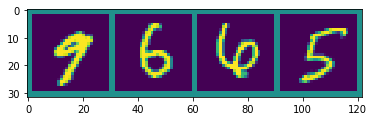

GroundTruth:
        4        0        7        4
Predicted:
        4        0        7        4


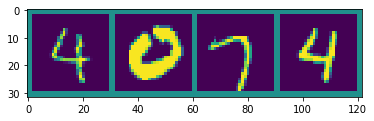

In [641]:
#!M
data_iter = iter(mnist_test_loader)
[data_iter.next() for i in range(5)]

for i in range(2):
    images, labels = data_iter.next()
    
    outputs = net(images)
    
    imgs = torchvision.utils.make_grid(images)
    gray_image = cv2.cvtColor(imgs.permute(1, 2, 0).numpy(), cv2.COLOR_BGR2GRAY)
    
    print('GroundTruth:\n', ' '.join('%8s' % classes[labels[j]] for j in range(4)))    # labels[j].numpy()

    _, predicted = torch.max(outputs, 1)
    print('Predicted:\n', ' '.join('%8s' % classes[predicted[j]] for j in range(4)))   # predicted[j].numpy()
    plt.imshow(gray_image)
    plt.show()

In [575]:
#!M
device = torch.device("cpu")   # torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = SimpleNet().to(device)   # SimpleNet(True).to(device)
print("Модель state_dict: ")
for param in net.state_dict():
    print("\t", param,": ", net.state_dict()[param].size())
    
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

Модель state_dict: 
	 fc1.weight :  torch.Size([128, 784])
	 fc1.bias :  torch.Size([128])
	 fc2.weight :  torch.Size([10, 128])
	 fc2.bias :  torch.Size([10])


In [576]:
#!M
mnist_train_loader_i1000 = torch.utils.data.DataLoader(mnist_train,
                                                    batch_size=1000,
                                                    shuffle=True,
                                                    num_workers=thr_num)

In [577]:
#!M
one_print = True
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(mnist_train_loader_i1000, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
#         inputs, labels = inputs.cuda(), labels.cuda()
        if one_print:
            print("images размеры view: %s\n" % (inputs.shape,))
            print("images размеры view reshape: %s\n\n" % (inputs.view(-1, 784).shape,))
            one_print = False
#         break

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 300 mini-batches
#             print("images размеры view: %s\n" % (inputs.shape,))
#             print("images размеры view reshape: %s\n" % (inputs.view(-1, 784).shape,))
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

images размеры view: torch.Size([1000, 1, 28, 28])

images размеры view reshape: torch.Size([1000, 784])


[1,    10] loss: 2.294
[1,    20] loss: 2.278
[1,    30] loss: 2.256
[1,    40] loss: 2.226
[1,    50] loss: 2.192
[1,    60] loss: 2.152
[2,    10] loss: 2.113
[2,    20] loss: 2.078
[2,    30] loss: 2.039
[2,    40] loss: 2.003
[2,    50] loss: 1.970
[2,    60] loss: 1.944
[3,    10] loss: 1.918
[3,    20] loss: 1.901
[3,    30] loss: 1.887
[3,    40] loss: 1.876
[3,    50] loss: 1.866
[3,    60] loss: 1.851
[4,    10] loss: 1.839
[4,    20] loss: 1.833
[4,    30] loss: 1.822
[4,    40] loss: 1.815
[4,    50] loss: 1.808
[4,    60] loss: 1.792
[5,    10] loss: 1.781
[5,    20] loss: 1.771
[5,    30] loss: 1.759
[5,    40] loss: 1.746
[5,    50] loss: 1.740
[5,    60] loss: 1.732
Finished Training


In [ ]:
#!M
